In [1]:
from processor_functions import *

In [18]:
# get some data
obsfiles=['../../datasets/gbins/bam/2017-07-03/BamObservation_000-000-{:03d}.gbin'.format(n) for n in range(0,32)]

bamobslist = []
i_file = 0

for i_file in range(25,30):
    reader = gbin_reader.GbinReader(obsfiles[i_file])
    for elmt in reader:
        if elmt.fov==1:
            bamobslist.append(elmt)
    reader.close()

In [19]:
len(bamobslist)

542

In [20]:
nfiles = 100
boxrad = 3

blists = [bamobslist[0:106], bamobslist[103:209], bamobslist[203:309],bamobslist[303:409],bamobslist[403:509]]

In [21]:
for l in blists:
    trackobslist = BamObs_extractor(l)
    TrackObs_list_writer(trackobslist, 'proctest')

In [6]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [103]:
inlist = read_Obslist_fits('proctest/2017/07/03/BAM-OBS1_OBMT_START_116051392797004704.fits')
#inlist = read_Obslist_fits('proctest/2017/07/03/BAM-OBS2_OBMT_START_116051416308529104.fits')

In [104]:
obs = inlist[12]
#obs = inlist[18]

In [105]:
for ii in range(len(obs.data)):
    if obs.data["DIM_AL"][ii]>10:
        print(ii, obs.data["DIM_AL"][ii])

6 19
19 11
42 14
59 15
60 22
71 87


In [107]:
itest=71
#itest=0

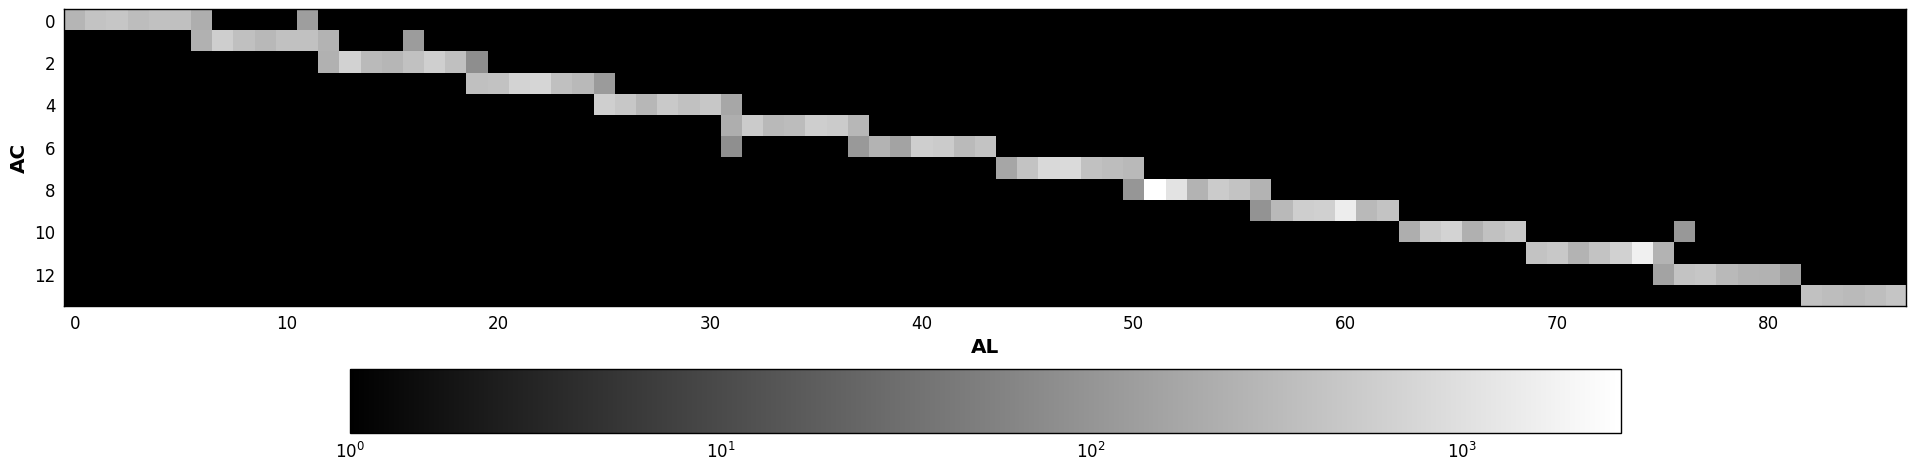

In [108]:
im = obs.data["TRACK"][itest].reshape(obs.data["DIM_AL"][itest],obs.data["DIM_AC"][itest])

im=np.rot90(im,1)
plt.xlabel('AL')
plt.ylabel('AC')
plt.imshow(im+1, cmap='gray', norm=LogNorm())
plt.gcf().set_size_inches(30.5, 5.5)
plt.colorbar(orientation="horizontal")
plt.grid(False)

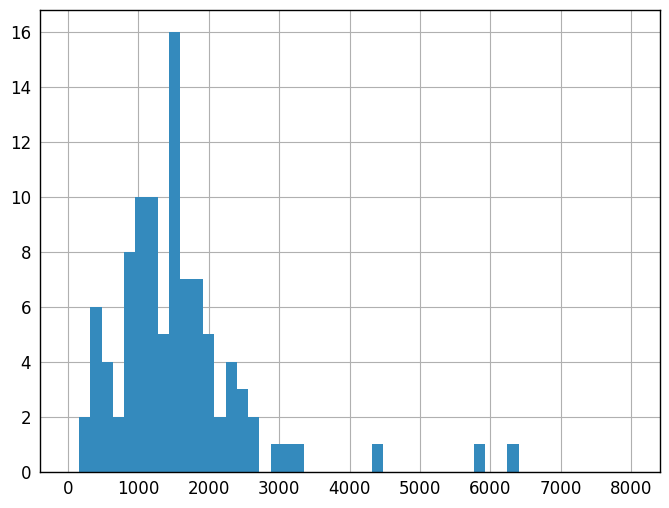

In [109]:
test = plt.hist(obs.gain*obs.data["TRACK"][itest][obs.data["TRACK"][itest]>0], 50, range=(0,8000))